In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import pandas as pd
import tensorflow as tf


In [2]:
# Import the csv
ed_df = pd.read_csv("GeorgiaData_UnionCounty/ga_data_overall_success.csv")

In [3]:
# find out the size of our data
print(ed_df.shape)

(120, 17)


In [4]:
# get a sample of the df
ed_df.head()

,Gender,Ethnicity,ELL,SWD,ED,SST,Gifted,Absences,Lexile,MATH 21 Scale Score,ELA 21 Scale Score,ELA 22 Pass,MATH 22 Pass,SCIE 22 Pass,SOCI 22 Pass,Subjects Passed,Overall Pass
0,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,Y,N,2,1155,492,494,1,1,0,1,3,0
1,MALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,40,885,494,443,0,1,1,1,3,0
2,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,28,1205,486,507,1,1,1,1,4,1
3,MALE,"WHITE, NOT OF HISPANIC ORIGIN",N,Y,N,N,N,1,955,472,455,0,0,0,0,0,0
4,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,10,1305,494,525,1,1,1,0,3,0


In [5]:
def gender_to_numeric(x):
    if x=='FEMALE': return 2
    if x=='MALE':   return 1

ed_df['gender_num'] = ed_df['Gender'].apply(gender_to_numeric)
ed_df.head()

,Gender,Ethnicity,ELL,SWD,ED,SST,Gifted,Absences,Lexile,MATH 21 Scale Score,ELA 21 Scale Score,ELA 22 Pass,MATH 22 Pass,SCIE 22 Pass,SOCI 22 Pass,Subjects Passed,Overall Pass,gender_num
0,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,Y,N,2,1155,492,494,1,1,0,1,3,0,2
1,MALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,40,885,494,443,0,1,1,1,3,0,1
2,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,28,1205,486,507,1,1,1,1,4,1,2
3,MALE,"WHITE, NOT OF HISPANIC ORIGIN",N,Y,N,N,N,1,955,472,455,0,0,0,0,0,0,1
4,FEMALE,"WHITE, NOT OF HISPANIC ORIGIN",N,N,Y,N,N,10,1305,494,525,1,1,1,0,3,0,2


In [6]:
ethnicity_list = ed_df['Ethnicity'].value_counts()
print(ethnicity_list)

WHITE, NOT OF HISPANIC ORIGIN       107
HISPANIC                              9
Two Or More Races                     2
AMERICAN INDIAN OR ALASKA NATIVE      1
ASIAN                                 1
Name: Ethnicity, dtype: int64


In [7]:
def ethnicity_to_numeric(x):
    if x=='AMERICAN INDIAN OR ALASKA NATIVE': return 5
    if x=='ASIAN': return 4
    if x=='Two Or More Races': return 3
    if x=='HISPANIC': return 2
    if x=='WHITE, NOT OF HISPANIC ORIGIN':   return 1

ed_df['ethnicity_num'] = ed_df['Ethnicity'].apply(ethnicity_to_numeric)

In [8]:
def SWD_to_numeric(x):
    if x=='Y': return 2
    if x=='N': return 1

ed_df['SWD_num'] = ed_df['SWD'].apply(SWD_to_numeric)

In [9]:
def ELL_to_numeric(x):
    if x=='Y': return 2
    if x=='N':   return 1

ed_df['ELL_num'] = ed_df['ELL'].apply(ELL_to_numeric)

In [10]:
def ED_to_numeric(x):
    if x=='Y': return 2
    if x=='N':   return 1

ed_df['ED_num'] = ed_df['ED'].apply(ED_to_numeric)

In [11]:
def Gifted_to_numeric(x):
    if x=='Y': return 2
    if x=='N':   return 1

ed_df['Gifted_num'] = ed_df['Gifted'].apply(Gifted_to_numeric)

In [12]:
def SST_to_numeric(x):
    if x=='Y': return 2
    if x=='N':   return 1

ed_df['SST_num'] = ed_df['SST'].apply(SST_to_numeric)

In [13]:
ed_num_df=ed_df.drop(['Gender','Ethnicity','SWD','ELL','ED','Gifted','SST','ELA 22 Pass','MATH 22 Pass','SCIE 22 Pass','SOCI 22 Pass','Subjects Passed'], axis=1)


In [14]:
ed_name_df = ed_num_df.rename(columns={"Lexile":"Lexile-Reading Proficiency","gender_num":"Gender","ethnicity_num":"Ethnicity","SWD_num":"Student with Disability",
                          "ELL_num":"English Language Learner","ED_num":"Economically Disadvantaged",
                            "Gifted_num":"Gifted","SST_num":"Student Support Team"})

In [15]:
# Define the sets
X = ed_name_df.copy()
X.drop("Overall Pass", axis=1, inplace=True)
X.head()

,Absences,Lexile-Reading Proficiency,MATH 21 Scale Score,ELA 21 Scale Score,Gender,Ethnicity,Student with Disability,English Language Learner,Economically Disadvantaged,Gifted,Student Support Team
0,2,1155,492,494,2,1,1,1,2,1,2
1,40,885,494,443,1,1,1,1,2,1,1
2,28,1205,486,507,2,1,1,1,2,1,1
3,1,955,472,455,1,1,2,1,1,1,1
4,10,1305,494,525,2,1,1,1,2,1,1


In [16]:
# ethnicity_list = ed_num_df['ethnicity_num'].tolist()
# print(ethnicity_list)

In [17]:
y = ed_name_df["Overall Pass"].ravel()
y[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
scaler = StandardScaler()

In [20]:
X_scaler = scaler.fit(X_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

In [23]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [24]:
predictions = rf_model.predict(X_test_scaled)

In [25]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Incomplete", "Full Pass"], columns=["Predicted 0", "Predicted 1"]
)

In [26]:
acc_score = accuracy_score(y_test, predictions)

In [27]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Incomplete,9,1
Full Pass,5,15


Accuracy Score : 0.8
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.94      0.75      0.83        20

    accuracy                           0.80        30
   macro avg       0.79      0.82      0.79        30
weighted avg       0.84      0.80      0.81        30



In [28]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.28439279303463555, 'ELA 21 Scale Score'),
 (0.2832352153856845, 'Lexile-Reading Proficiency'),
 (0.21355110444330155, 'MATH 21 Scale Score'),
 (0.0929991840383519, 'Absences'),
 (0.04601283956143001, 'Student Support Team'),
 (0.020139995819267426, 'Gifted'),
 (0.0179718483527238, 'Gender'),
 (0.017420833523603994, 'Student with Disability'),
 (0.015664830117569837, 'Economically Disadvantaged'),
 (0.004584003071072439, 'Ethnicity'),
 (0.004027352652359078, 'English Language Learner')]

<AxesSubplot:title={'center':'Student Demographics by Importance'}, ylabel='1'>

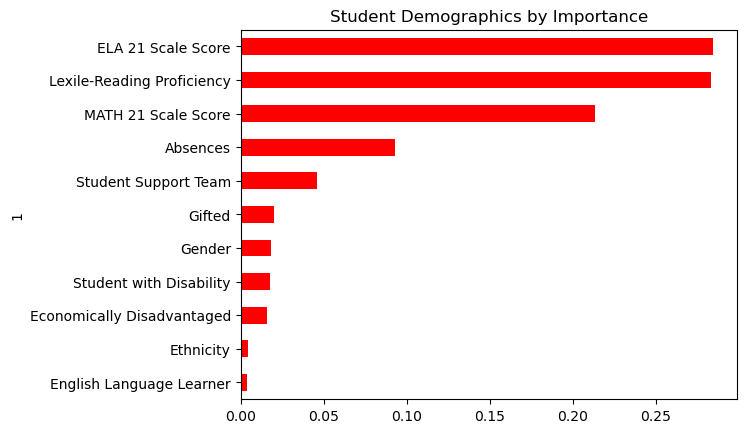

In [29]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='red', title= 'Student Demographics by Importance', legend=False)

In [30]:
kag_df = pd.read_csv("KaggleData/exams.csv")
kag_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [31]:
# Add column for average score
kag_df['total score'] = kag_df['math score'] + kag_df['reading score'] + kag_df['writing score']
kag_df['success'] = kag_df['total score'].apply(lambda x: 0 if x < 210 else 1)
kag_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,success
0,female,group D,some college,standard,completed,59,70,78,207,0
1,male,group D,associate's degree,standard,none,96,93,87,276,1
2,female,group D,some college,free/reduced,none,57,76,77,210,1
3,male,group B,some college,free/reduced,none,70,70,63,203,0
4,female,group D,associate's degree,standard,none,83,85,86,254,1


In [32]:
kag_clean_df = kag_df.drop(['math score', 'reading score', 'writing score','total score'], axis=1)
kag_clean_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,success
0,female,group D,some college,standard,completed,0
1,male,group D,associate's degree,standard,none,1
2,female,group D,some college,free/reduced,none,1
3,male,group B,some college,free/reduced,none,0
4,female,group D,associate's degree,standard,none,1


In [33]:
race_list = kag_clean_df['test preparation course'].value_counts()
print(race_list)

none         656
completed    344
Name: test preparation course, dtype: int64


In [34]:
def gender_numeric(x):
    if x=='female': return 2
    if x=='male':   return 1

kag_clean_df['gender_num'] = kag_clean_df['gender'].apply(gender_numeric)

In [35]:
def ethnicity_numeric(x):
    if x=='group E': return 5
    if x=='group D': return 4
    if x=='group C': return 3
    if x=='group B': return 2
    if x=='group A': return 1

kag_clean_df['ethnicity_num'] = kag_clean_df['race/ethnicity'].apply(ethnicity_numeric)

In [36]:
def parent_numeric(x):
    if x=="some college": return 6
    if x=="high school": return 5
    if x=="associate's degree": return 4
    if x=="some high school": return 3
    if x=="bachelor's degree": return 2
    if x=="master's degree":   return 1

kag_clean_df['parent_num'] = kag_clean_df['parental level of education'].apply(parent_numeric)

In [37]:
def lunch_numeric(x):
    if x=='standard': return 2
    if x=='free/reduced': return 1

kag_clean_df['lunch_num'] = kag_clean_df['lunch'].apply(lunch_numeric)


In [38]:
def test_numeric(x):
    if x=='none': return 2
    if x=='completed':   return 1

kag_clean_df['test_num'] = kag_clean_df['test preparation course'].apply(test_numeric)
kag_clean_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,success,gender_num,ethnicity_num,parent_num,lunch_num,test_num
0,female,group D,some college,standard,completed,0,2,4,6,2,1
1,male,group D,associate's degree,standard,none,1,1,4,4,2,2
2,female,group D,some college,free/reduced,none,1,2,4,6,1,2
3,male,group B,some college,free/reduced,none,0,1,2,6,1,2
4,female,group D,associate's degree,standard,none,1,2,4,4,2,2


In [39]:
kag_end_df = kag_clean_df.drop(['gender', 'race/ethnicity', 'parental level of education','lunch','test preparation course'], axis=1)
kag_end_df.head()

,success,gender_num,ethnicity_num,parent_num,lunch_num,test_num
0,0,2,4,6,2,1
1,1,1,4,4,2,2
2,1,2,4,6,1,2
3,0,1,2,6,1,2
4,1,2,4,4,2,2


In [40]:
kag_name_df = kag_end_df.rename(columns={"gender_num":"Gender","ethnicity_num":"Ethnicity","parent_num":"Parental Level of Education",
                          "lunch_num":"Financial Assited Lunch Program","test_num":"Test Preparation Course Participation",})

In [41]:
# Define the sets
X = kag_name_df.copy()
X.drop("success", axis=1, inplace=True)
X.head()

,Gender,Ethnicity,Parental Level of Education,Financial Assited Lunch Program,Test Preparation Course Participation
0,2,4,6,2,1
1,1,4,4,2,2
2,2,4,6,1,2
3,1,2,6,1,2
4,2,4,4,2,2


In [42]:
y = kag_name_df["success"].ravel()
y[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
scaler = StandardScaler()

In [45]:
X_scaler = scaler.fit(X_train)

In [46]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

In [48]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [49]:
predictions = rf_model.predict(X_test_scaled)

In [50]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Incomplete", "Full Pass"], columns=["Predicted 0", "Predicted 1"]
)

In [51]:
acc_score = accuracy_score(y_test, predictions)

In [52]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Incomplete,71,47
Full Pass,49,83


Accuracy Score : 0.616
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.60      0.60       118
           1       0.64      0.63      0.63       132

    accuracy                           0.62       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.62      0.62      0.62       250



In [53]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.35536318744046225, 'Parental Level of Education'),
 (0.30563227281227723, 'Ethnicity'),
 (0.15711290418465906, 'Financial Assited Lunch Program'),
 (0.10105537238261289, 'Test Preparation Course Participation'),
 (0.08083626317998863, 'Gender')]

<AxesSubplot:title={'center':'Student Demographics by Importance'}, ylabel='1'>

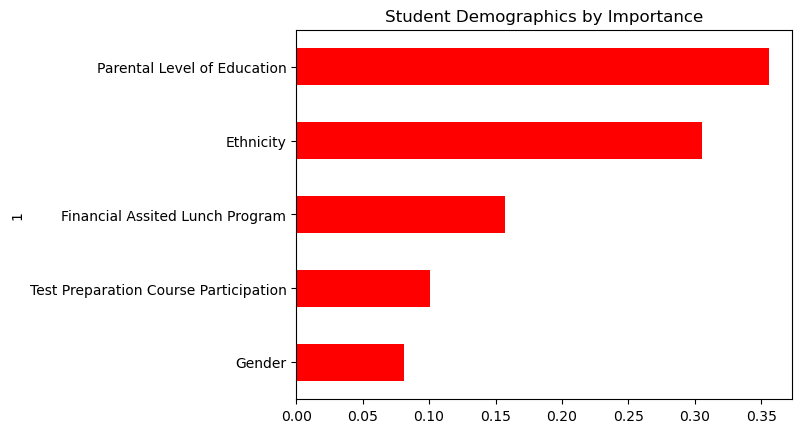

In [54]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='red', title= 'Student Demographics by Importance', legend=False)

In [55]:
# Import the csv
fl_df = pd.read_csv("FloridaData/combined_fl_data.csv")
fl_df.head()

,Unnamed: 0,Grade,English Grade,Math Grade,Science Grade,Humanities Grade,Computer Science Grade,Computer Science A
0,2,12,92.47,90.86,92.95,93.96,97.00,1
1,8,9,96.56,90.75,87.52,94.93,91.78,1
2,9,11,92.98,96.70,93.15,95.58,94.90,1
3,10,11,92.98,96.70,93.15,96.00,94.90,1
4,11,10,85.08,81.70,86.12,89.27,81.97,0


In [56]:
fl_compA_df = fl_df.drop(["Computer Science Grade","Unnamed: 0"], axis=1)
fl_compA_df.head()


,Grade,English Grade,Math Grade,Science Grade,Humanities Grade,Computer Science A
0,12,92.47,90.86,92.95,93.96,1
1,9,96.56,90.75,87.52,94.93,1
2,11,92.98,96.70,93.15,95.58,1
3,11,92.98,96.70,93.15,96.00,1
4,10,85.08,81.70,86.12,89.27,0


In [57]:
fl_compA_df2 = fl_compA_df.rename(columns={"Grade":"Grade level"})

In [58]:
# Define the sets
X = fl_compA_df2.copy()
X.drop("Computer Science A", axis=1, inplace=True)
X.head()

,Grade level,English Grade,Math Grade,Science Grade,Humanities Grade
0,12,92.47,90.86,92.95,93.96
1,9,96.56,90.75,87.52,94.93
2,11,92.98,96.70,93.15,95.58
3,11,92.98,96.70,93.15,96.00
4,10,85.08,81.70,86.12,89.27


In [59]:
y = fl_compA_df2["Computer Science A"].ravel()
y[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
scaler = StandardScaler()

In [62]:
X_scaler = scaler.fit(X_train)

In [63]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [64]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

In [65]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [66]:
predictions = rf_model.predict(X_test_scaled)

In [67]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Comp Sci Negative", "Comp Sci A"], columns=["Predicted 0", "Predicted 1"]
)

In [68]:
acc_score = accuracy_score(y_test, predictions)

In [69]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Comp Sci Negative,5,9
Comp Sci A,5,51


Accuracy Score : 0.8
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        14
           1       0.85      0.91      0.88        56

    accuracy                           0.80        70
   macro avg       0.68      0.63      0.65        70
weighted avg       0.78      0.80      0.79        70



In [70]:
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.29277766568967545, 'Humanities Grade'),
 (0.2618198794377096, 'English Grade'),
 (0.19398997058668802, 'Science Grade'),
 (0.18922523576857248, 'Math Grade'),
 (0.06218724851735433, 'Grade level')]

<AxesSubplot:title={'center':'Student Demographics by Importance'}, ylabel='1'>

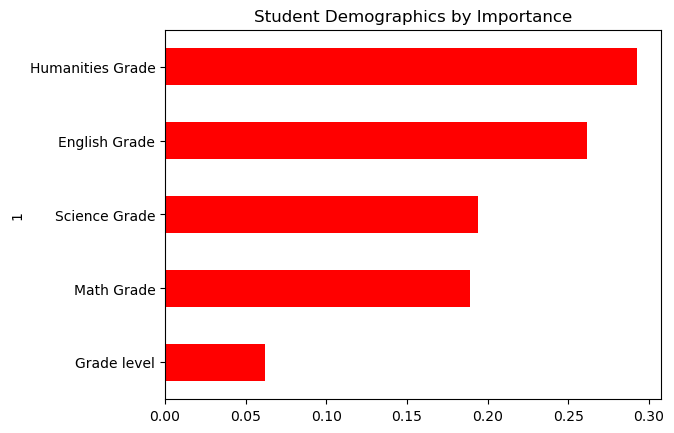

In [71]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='red', title= 'Student Demographics by Importance', legend=False)